In [1]:
# 添加项目 PYTHONPATH
import sys
import os
current_dir = os.path.abspath("")

project_root = os.path.abspath(os.path.join(current_dir,"../../"))

sys.path.append(project_root)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


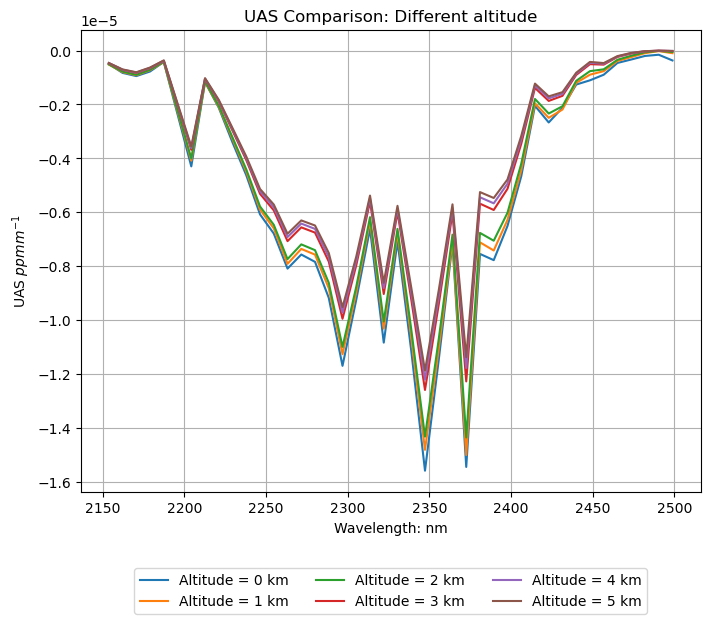

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

from utils.satellites_data import general_functions as gf
from utils import satellites_data as sd
from utils import generate_radiance_lut_and_uas as glut
from utils import simulate_images as si
from methane_retrieval_algorithms.matchedfilter import matched_filter as mf

wvls, general_uas = glut.generate_satellite_uas_for_specific_range_from_lut(
    "AHSI", 0, 50000, 2150, 2500, 25, 0
)

# 参数设置
start = 0
end_range = 50000
step_1 = 10000  # 图一的尾部间隔
step_2 = 10000  # 图二的固定间隔

# # 图一：头部固定为 0，尾部从 5000 到 50000，间隔逐步增加
# plt.figure(figsize=(8, 6))
# for end in range(5000, end_range + 1, step_1):
#     x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
#         "AHSI", 0, end, 2150, 2500, 55, 0
#     )
#     plt.plot(x, uas, label=f'Range: 0-{end}')

# plt.title("UAS Comparison: Different Range")
# plt.xlabel("Wavelength: nm")
# plt.ylabel("UAS")
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
# plt.grid(True)

# # 图二：固定间隔 10000，从 0-10000 到 40000-50000
# plt.figure(figsize=(8, 6))
# for start in range(0, end_range, step_2):
#     end = start + step_2
#     x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
#         "AHSI", start, end, 2150, 2500, 25, 0
#     )
#     plt.plot(x, uas, label=f'Range: {start}-{end}')

# plt.title("UAS Comparison: Interval Fixed at 10000")
# plt.xlabel("Wavelength: nm")
# plt.ylabel("UAS")
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
# plt.grid(True)

# # 显示图像
# plt.show()

# # 图二：固定间隔 10000，从 0-10000 到 40000-50000
# szas = [0, 15, 30, 45, 60, 75,85]
# plt.figure(figsize=(8, 6))
# for sza in szas:
#     x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
#         "AHSI", 0, 2500, 2150, 2500, sza, 0
#     )
#     plt.plot(x, uas, label=f'SZA = {sza}°')

# plt.title("UAS Comparison: Different SZA")
# plt.xlabel("Wavelength: nm")
# plt.ylabel(r"UAS $ppmm^{-1}$")
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
# plt.grid(True)

# # 显示图像
# plt.show()

# 图二：固定间隔 10000，从 0-10000 到 40000-50000
altitudes = [0, 1,2,3,4,5]
plt.figure(figsize=(8, 6))
for altitude in altitudes:
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, 2500, 2150, 2500, 0, altitude
    )
    plt.plot(x, uas, label=f'Altitude = {altitude} km')

plt.title("UAS Comparison: Different altitude")
plt.xlabel("Wavelength: nm")
plt.ylabel(r"UAS $ppmm^{-1}$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

plt.savefig("UAS comparison.pdf", format="pdf")
plt.savefig("UAS comparison.eps", format="eps")
# 显示图像
plt.show()

